Peak engagement times across different platforms

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and check empty observation
data = pd.read_csv('test_sample.csv', on_bad_lines='skip', engine='python')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10525 entries, 0 to 10524
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10525 non-null  object 
 1   account_id       10000 non-null  object 
 2   id               10047 non-null  object 
 3   created_time     10000 non-null  object 
 4   text_original    7660 non-null   object 
 5   text_additional  3 non-null      object 
 6   likes_count      9951 non-null   float64
 7   shares_count     5000 non-null   float64
 8   comments_count   9908 non-null   float64
 9   views_count      5621 non-null   float64
dtypes: float64(4), object(6)
memory usage: 822.4+ KB


Considering the number of entries in each column, the "likes_count" column has the fewest missing values, so I will use it as the basis for further analysis.

In [2]:
# Data Cleaning

# Droping non useful columns
data = data.drop(columns=['account_id', 'id', 'text_original', 'text_additional', 'shares_count', 'comments_count', 'views_count'])

# Check empty observation
columns_to_check = ['platform', 'likes_count', 'created_time'] 
data.dropna(subset=columns_to_check, inplace=True)

print(data.isna().sum())

platform        0
created_time    0
likes_count     0
dtype: int64


In [4]:
print(data.tail())

      platform                       created_time  likes_count
10520  YouTube  2024-10-10 15:16:59.000000 +00:00       2165.0
10521  YouTube  2024-09-30 03:30:33.000000 +00:00         53.0
10522  YouTube  2024-09-29 15:45:01.000000 +00:00       1271.0
10523  YouTube  2024-09-29 09:30:27.000000 +00:00        302.0
10524  YouTube  2024-09-29 03:45:01.000000 +00:00       1920.0


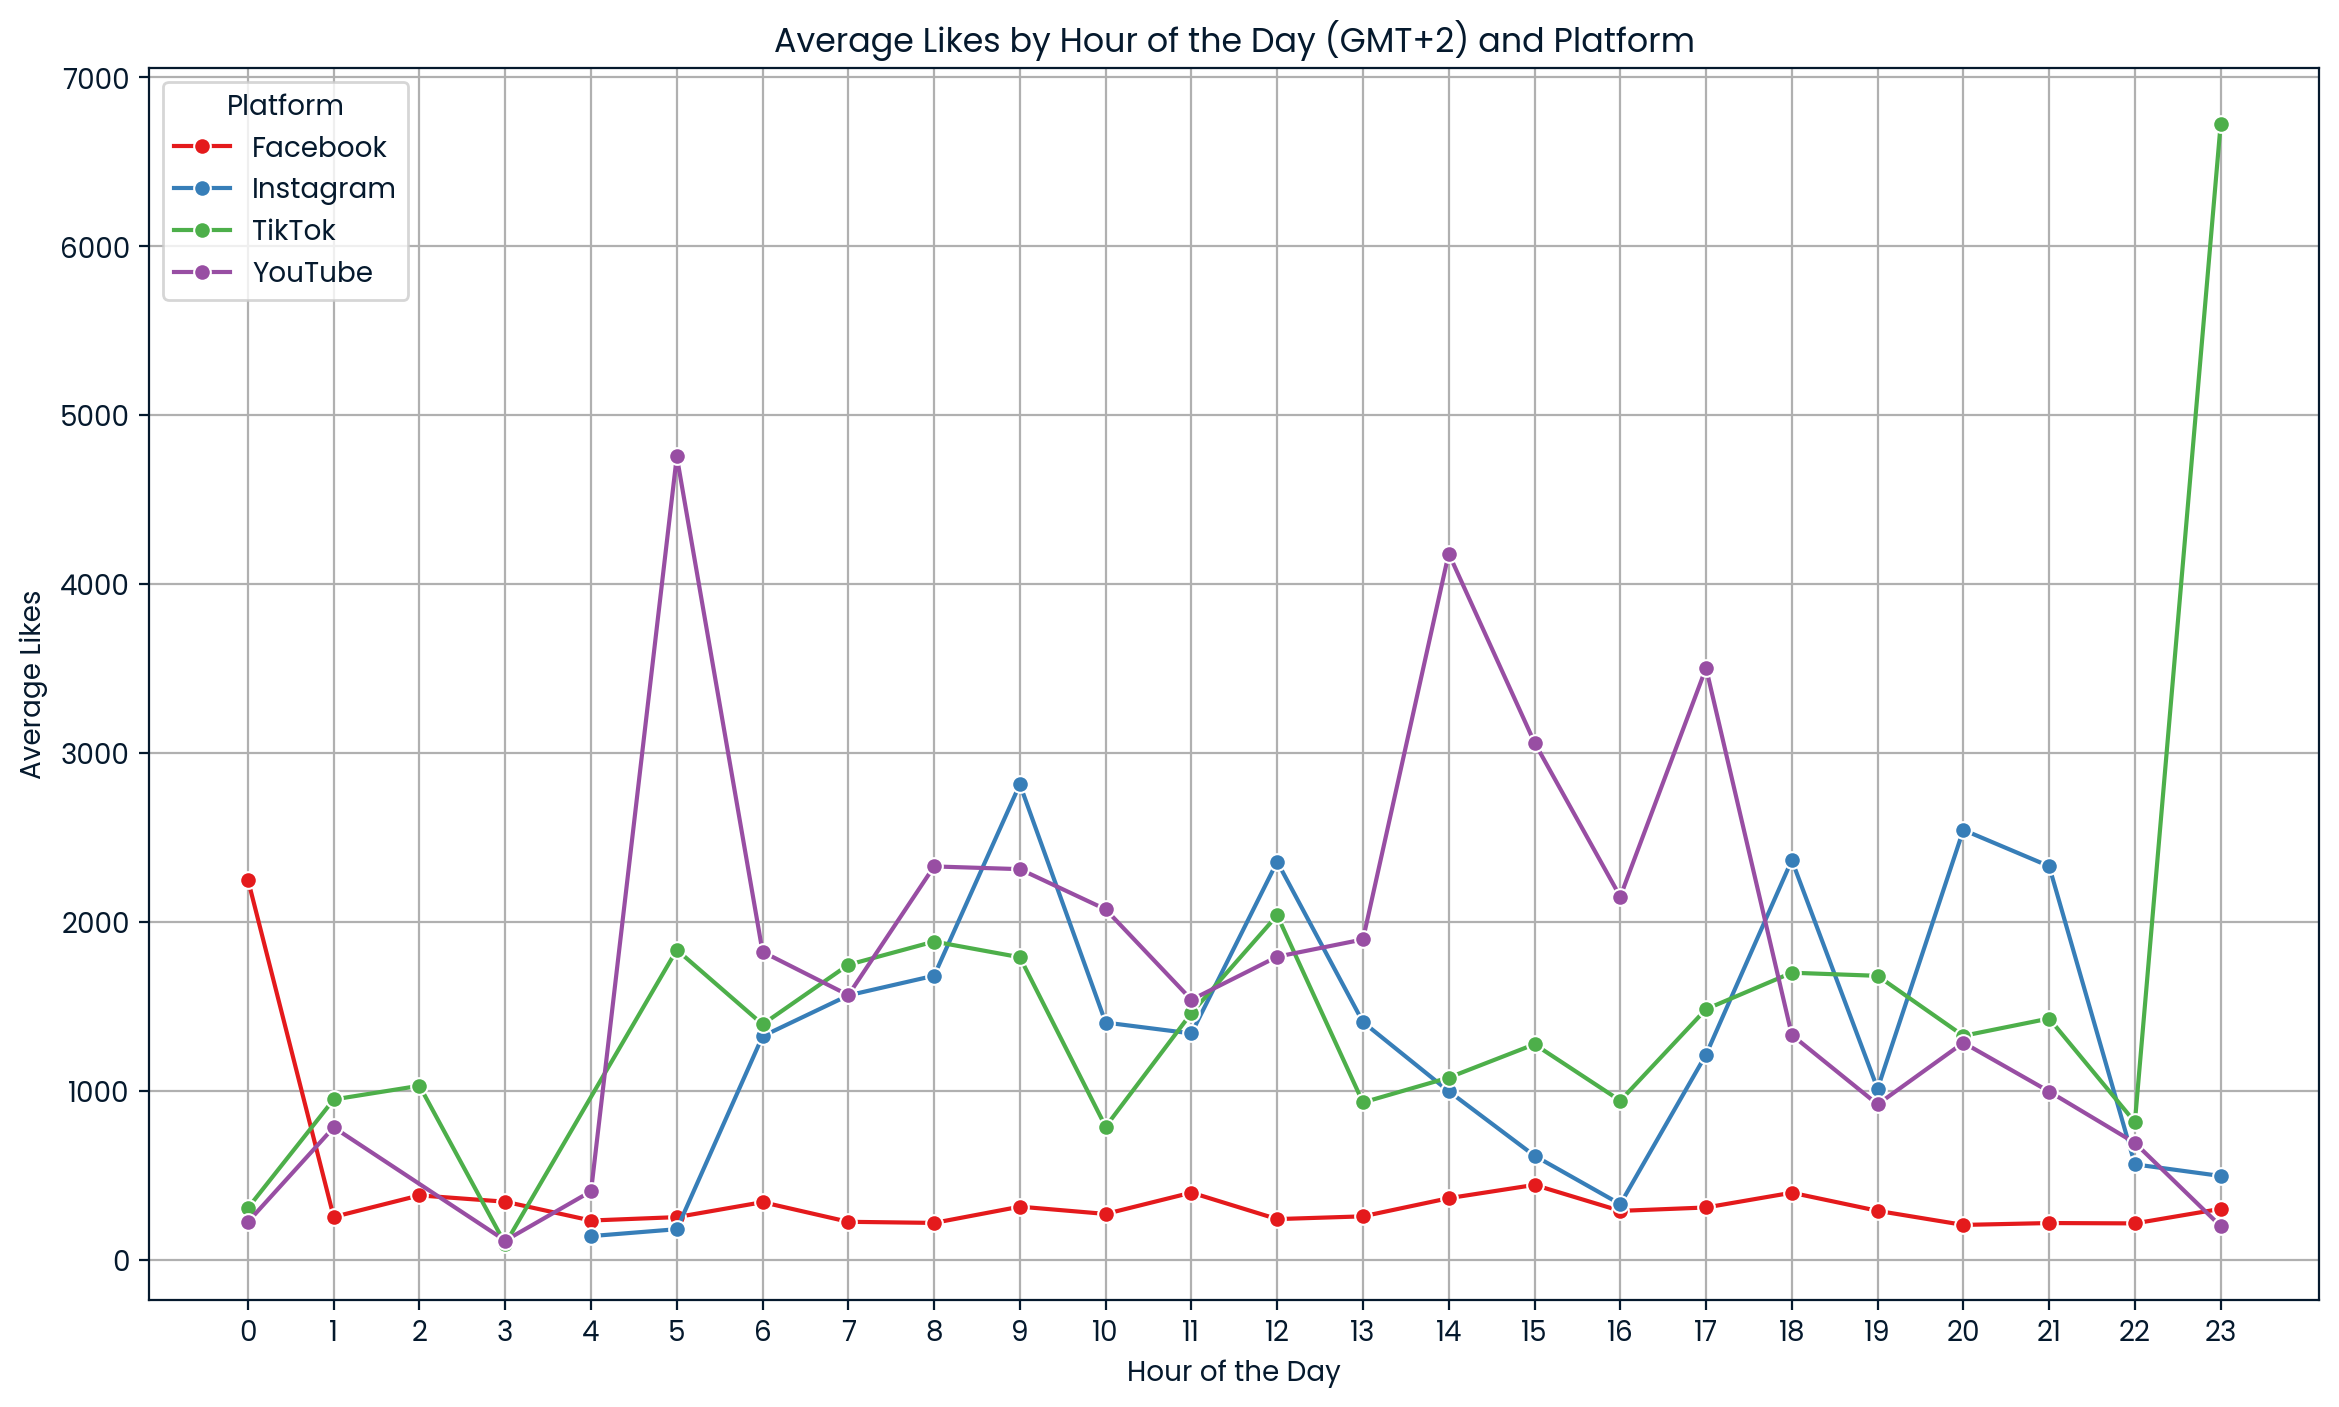

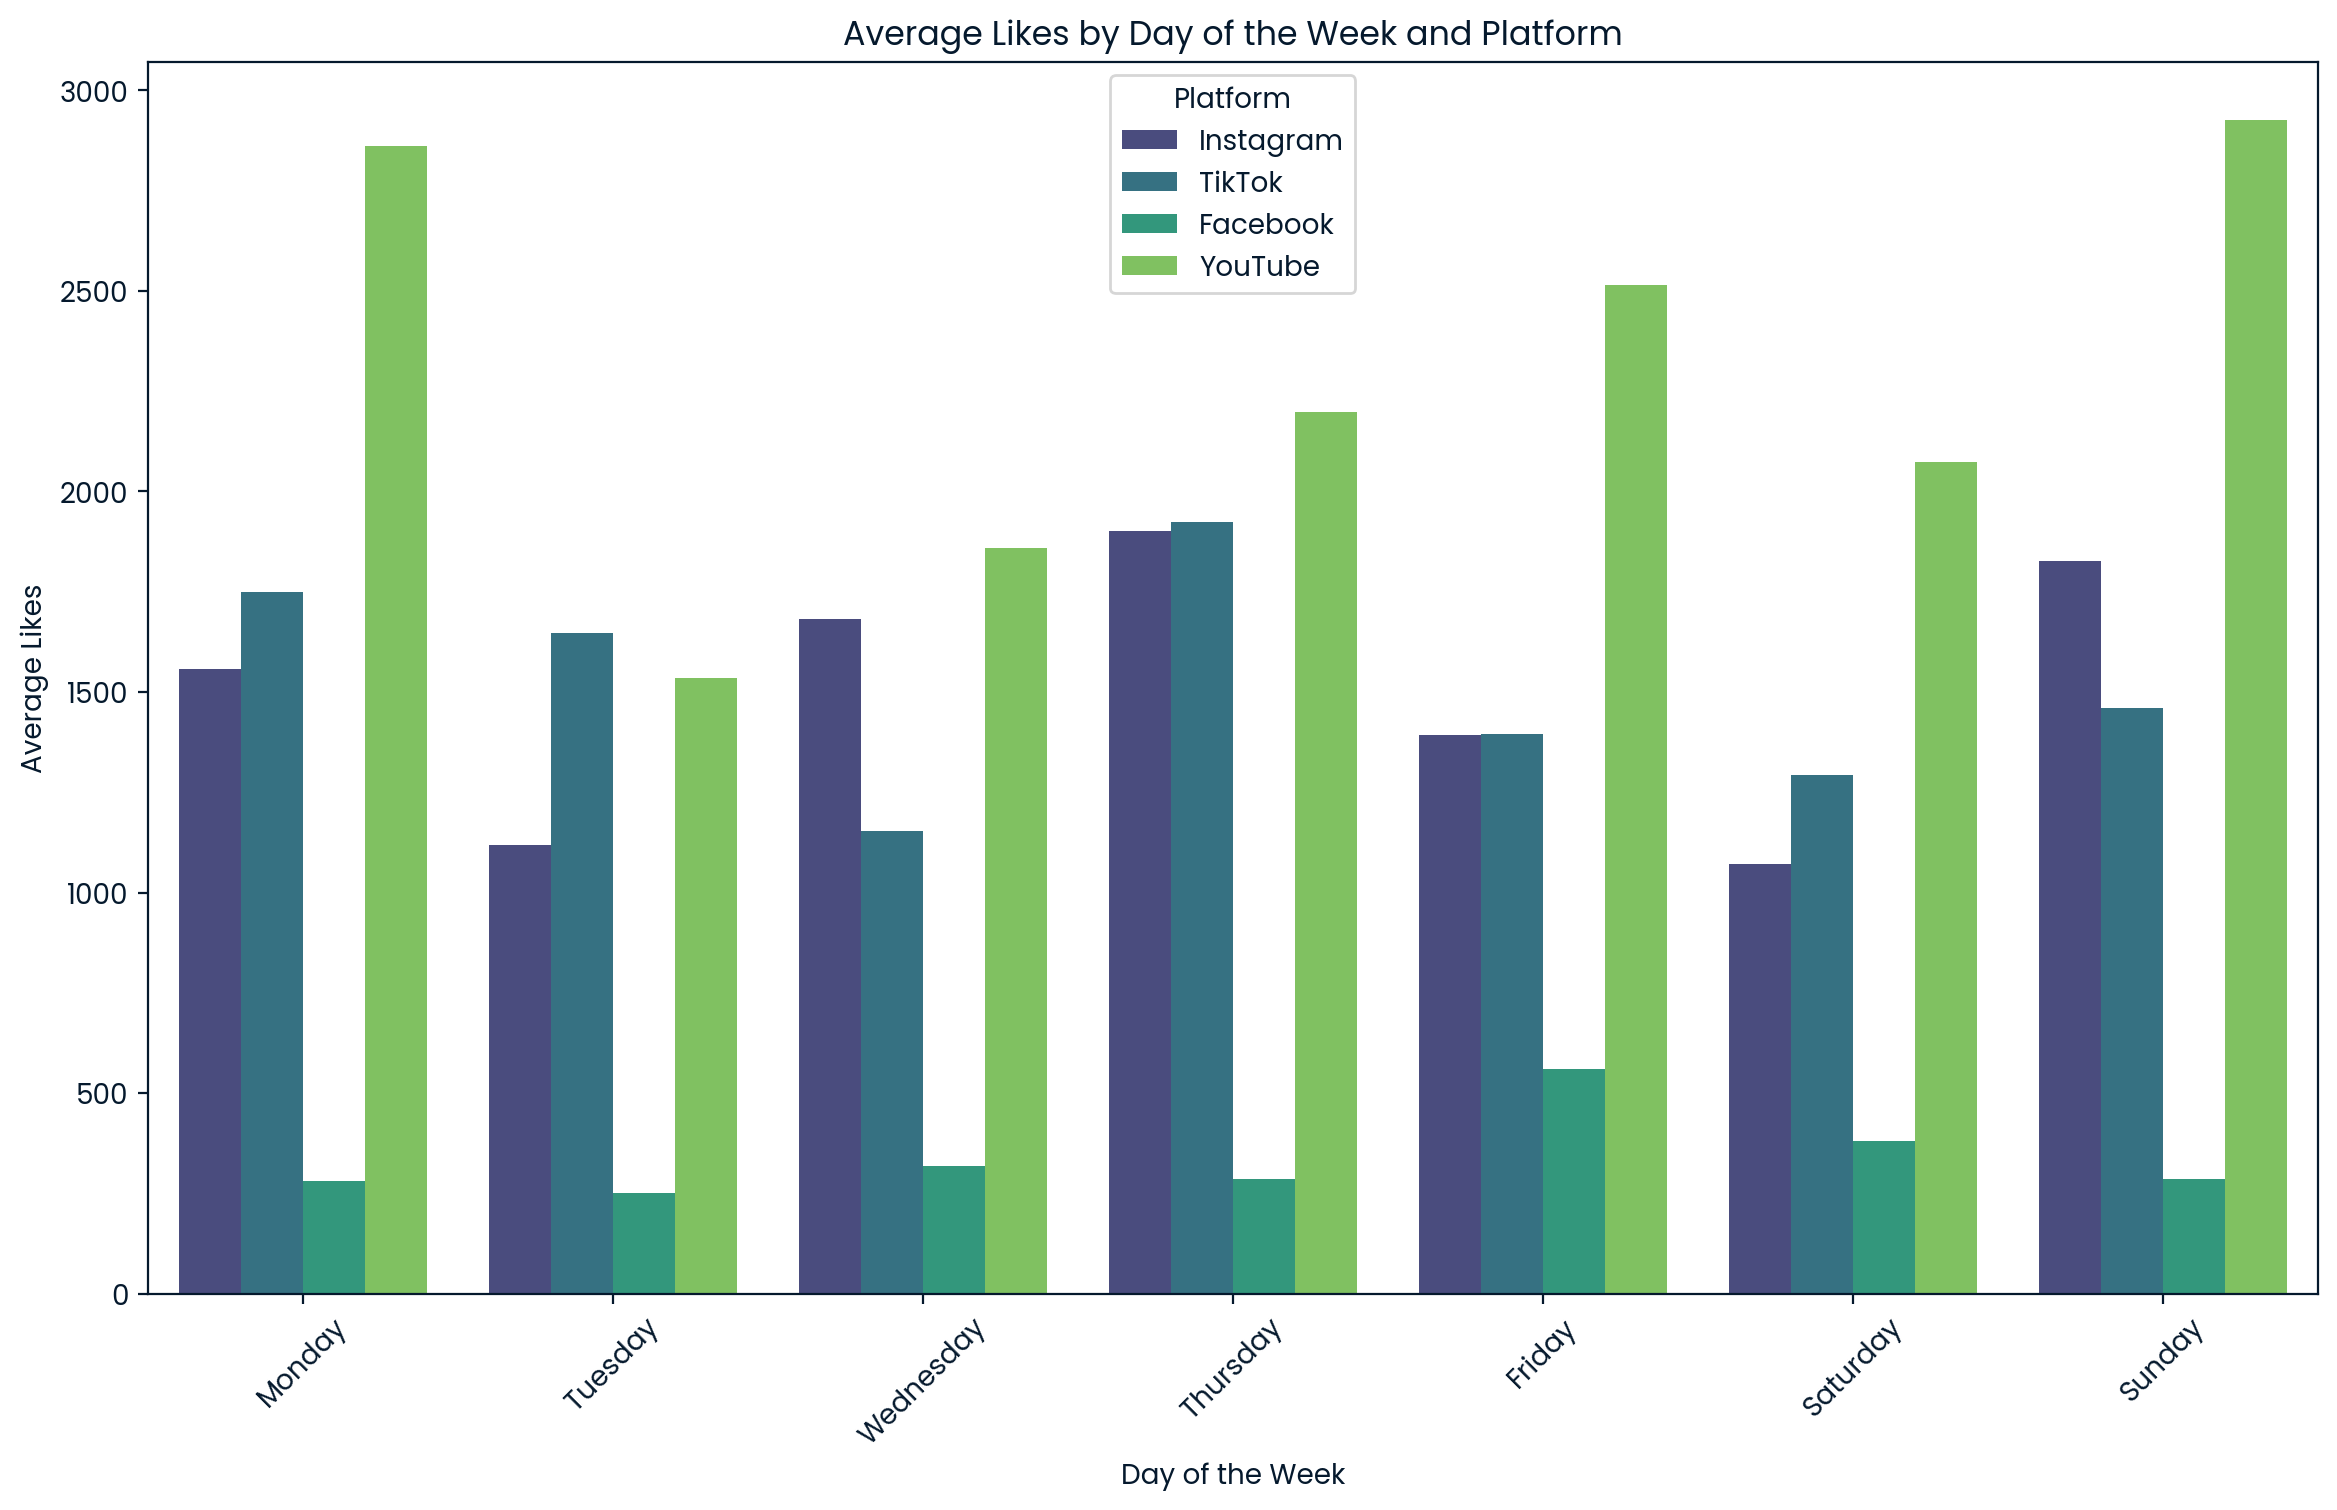

In [8]:
# Convert 'created_time' to datetime
data['created_time'] = pd.to_datetime(data['created_time'])

# Convert timestamps to GMT+2 (сonsidering that this is dataset's original time zone)
data['created_time'] = data['created_time'].dt.tz_convert('Etc/GMT-2')  

data['hour'] = data['created_time'].dt.hour
data['day_of_week'] = data['created_time'].dt.day_name()

# Analysis

# Group by platform and hour & calculate the average likes
hourly_likes_by_platform = (
    data.groupby(['platform', 'hour'])['likes_count'].mean().reset_index())

# Group by platform and day of the week & calculate the average likes
weekly_likes_by_platform = (
    data.groupby(['platform', 'day_of_week'])['likes_count'].mean().reindex(
        pd.MultiIndex.from_product(
            [data['platform'].unique(), 
             ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
            names=['platform', 'day_of_week']
        )
    ).reset_index()
)

# Visualization 

# Plot hourly likes by platform
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=hourly_likes_by_platform,
    x='hour',
    y='likes_count',
    hue='platform',
    marker='o',
    palette='Set1'
)
plt.title("Average Likes by Hour of the Day (GMT+2) and Platform")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Likes")
plt.xticks(range(0, 24))
plt.grid()
plt.legend(title="Platform")
plt.show()

# Plot weekly likes by platform
plt.figure(figsize=(14, 8))
sns.barplot(
    data=weekly_likes_by_platform,
    x='day_of_week',
    y='likes_count',
    hue='platform',
    palette='viridis'
)
plt.title("Average Likes by Day of the Week and Platform")
plt.xlabel("Day of the Week")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.legend(title="Platform")
plt.show()

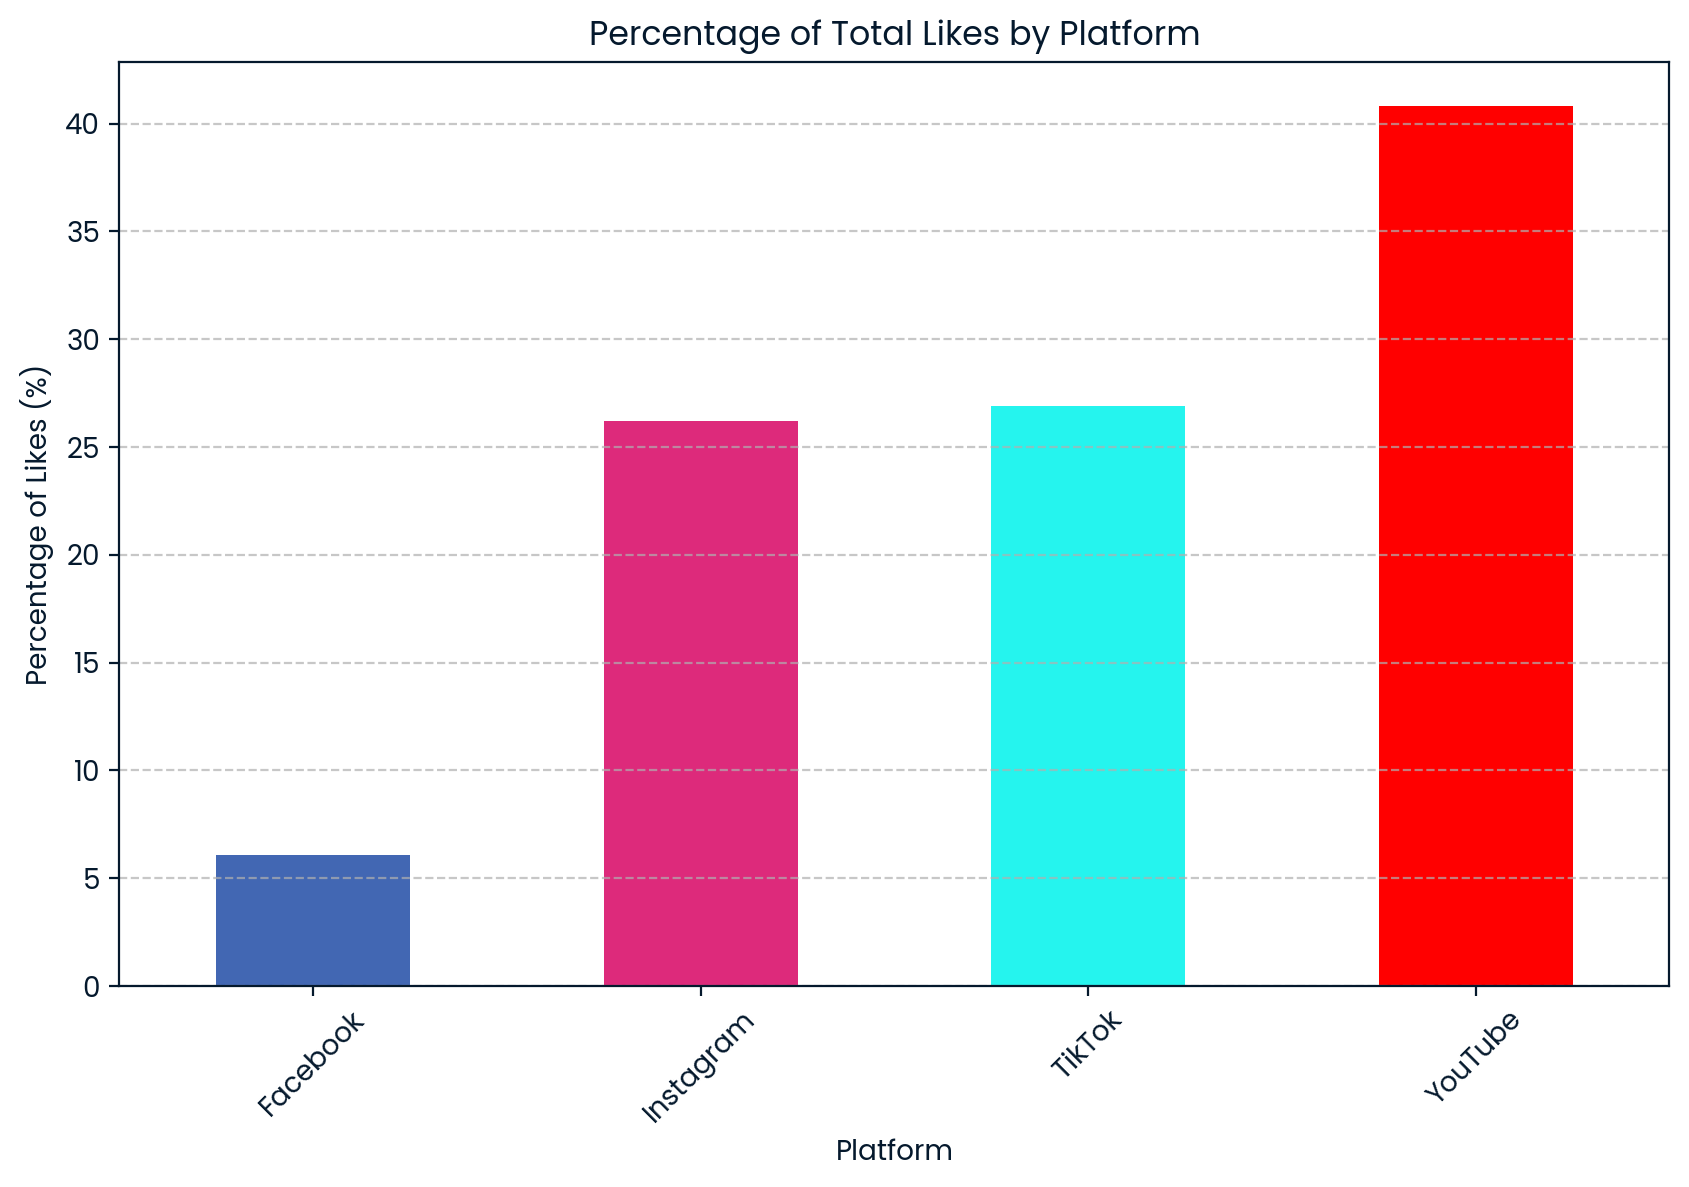

In [6]:
# Group by platform and sum likes
platform_likes = data.groupby('platform')['likes_count'].sum()

# Calculate the percentage of total likes for each platform
platform_likes_percentage = (platform_likes / platform_likes.sum()) * 100

# Visualization: Bar Chart of Likes Percentage
plt.figure(figsize=(10, 6))
bar_colors = ['#4267B3', '#DD2A7B', '#25F4EE', '#FF0000']
platform_likes_percentage.plot(kind='bar', color=bar_colors)
plt.title("Percentage of Total Likes by Platform")
plt.xlabel("Platform")
plt.ylabel("Percentage of Likes (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusions

Based on the provided dataset, the following conclusions can be drawn from the analysis:
First of all, the number of likes was not consistent across all platforms, which influenced the results, particularly on Facebook, as it had the lowest number of likes. However, even considering this lower number, a slight peak was observed around midnight and a small increase at 11:00 AM and 3:00 PM. Regarding the days of the week, Friday stood out as more active than other days.

On the other hand, YouTube had the highest number of likes, which allowed for a more reliable analysis. Therefore, the best times to post on YouTube were at 5:00 AM, 2:00 PM, and 5:00 PM, with the best days being Monday, Sunday, and Friday.

Instagram and TikTok had a similar number of likes. For Instagram, the best posting times were 9:00 AM and 8:00 PM, with a slight dip at 9:00 PM. There was also higher activity at 12:00 PM and 6:00 PM. The best days for Instagram were Thursday, Wednesday, and Sunday. 

On TikTok, peak hours were similar to Instagram, although this platform showed higher activity throughout the day, with a sharp spike around midnight. The most active hours were 5:00 AM, just like on YouTube, followed by 7:00 to 8:00 AM, 12:00 PM, and evenings from 5:00 PM to 7:00 PM. The peak days for TikTok were Thursday, Monday, and Tuesday.
You can also notice negative correlation during certain hours on YouTube and Instagram